# Data Cleaning and Preparation 

In [145]:
# Importing libraries

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
# Loading all datasets
df_main = pd.read_csv("data/source/train.csv") # Main sales data
df_features = pd.read_csv("data/source/features.csv") # Additional feature data
df_store = pd.read_csv("data/source/stores.csv") # Store data

# df_test = pd.read_csv("data/source/test.csv") # We don't need this. it's only for the Kaggle submission (Walmart has provided this test dataset without target variable value for Kaggle submission. We will split train dataset for predictive model training later.

In [147]:
print(f"Shape of df_main: {df_main.shape}")
df_main.head()

Shape of df_main: (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [148]:
print(f"Shape of df_features: {df_features.shape}")
df_features.head()

Shape of df_features: (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [149]:
print(f"Shape of df_store: {df_store.shape}")
df_store.head()

Shape of df_store: (45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### 1. Handle Missing Values

In [150]:
df_main.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [151]:
df_store.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [152]:
df_features.isna().sum()

# Calculate missing value count as a percentage
missing_values = df_features.isnull().sum()
total_rows = len(df_features)
missing_percentage = (missing_values / total_rows) * 100
missing_table = pd.DataFrame({
    'Feature': df_features.columns,
    'Missing Value Count': missing_values,
    '% of Total': missing_percentage
})

missing_table = missing_table[missing_table['Missing Value Count'] > 0]
missing_table = missing_table.reset_index(drop=True)
print(missing_table)

        Feature  Missing Value Count  % of Total
0     MarkDown1                 4158   50.769231
1     MarkDown2                 5269   64.334554
2     MarkDown3                 4577   55.885226
3     MarkDown4                 4726   57.704518
4     MarkDown5                 4140   50.549451
5           CPI                  585    7.142857
6  Unemployment                  585    7.142857


In [153]:
# Fill missing values

# (CPI) Consumer price index
df_features['CPI'].fillna(df_features['CPI'].mean(), inplace=True) # Applied Mean Imputation
df_features['Unemployment'].fillna(df_features['Unemployment'].mean(),inplace=True) # Applied Mean Imputation

C:\Users\ishar\AppData\Local\Temp\ipykernel_381356\1868753764.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features['CPI'].fillna(df_features['CPI'].mean(), inplace=True) # Applied Mean Imputation
C:\Users\ishar\AppData\Local\Temp\ipykernel_381356\1868753764.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [154]:
# Remove all MarkDown columns
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df_features = df_features.drop(columns=markdown_columns)
print(df_features.head())

   Store        Date  Temperature  Fuel_Price         CPI  Unemployment  \
0      1  2010-02-05        42.31       2.572  211.096358         8.106   
1      1  2010-02-12        38.51       2.548  211.242170         8.106   
2      1  2010-02-19        39.93       2.514  211.289143         8.106   
3      1  2010-02-26        46.63       2.561  211.319643         8.106   
4      1  2010-03-05        46.50       2.625  211.350143         8.106   

   IsHoliday  
0      False  
1       True  
2      False  
3      False  
4      False  


In [155]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           8190 non-null   float64
 5   Unemployment  8190 non-null   float64
 6   IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 392.0+ KB


In [156]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


### 2. Merge Datasets

We have main dataset and another 2 datasets which contains additional set of features and store features. We will merge these three dataset into a single dataset.

Verify the data consistency(of joining columns) before merging

In [157]:
# Convert store columns to string
df_features['Store'] = df_features['Store'].astype(str)
df_main['Store'] = df_main['Store'].astype(str)
df_store['Store'] = df_store['Store'].astype(str)

# Convert date columns to datetime format
df_features['Date'] = pd.to_datetime(df_features['Date'])
df_main['Date'] = pd.to_datetime(df_main['Date'])

# Remove any spaces in the join columns in the merge
df_features['Store'] = df_features['Store'].str.strip()
df_main['Store'] = df_main['Store'].str.strip()
df_store['Store'] = df_store['Store'].str.strip()

In [158]:
# Merge main train data and store data
df_temp = pd.merge(df_main, df_store,  how='left', on='Store')
df_temp.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [159]:
# Merge additional feature data to df_temp
df = pd.merge(df_features, df_temp, on=['Store', 'Date'], how='inner')
df.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,211.096358,8.106,False,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,211.096358,8.106,False,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,211.096358,8.106,False,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,211.096358,8.106,False,5,32229.38,False,A,151315


In [160]:
# Rename original column names meaningfully
df.rename(columns={'Type': 'Store_Type', 'Size': 'Store_Size'}, inplace=True)
df.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Store_Type,Store_Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,211.096358,8.106,False,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,211.096358,8.106,False,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,211.096358,8.106,False,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,211.096358,8.106,False,5,32229.38,False,A,151315


In [161]:
# Verify final merged dataset
df.info()
print(f"Shape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  object        
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   CPI           421570 non-null  float64       
 5   Unemployment  421570 non-null  float64       
 6   IsHoliday_x   421570 non-null  bool          
 7   Dept          421570 non-null  int64         
 8   Weekly_Sales  421570 non-null  float64       
 9   IsHoliday_y   421570 non-null  bool          
 10  Store_Type    421570 non-null  object        
 11  Store_Size    421570 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 33.0+ MB
Shape: (421570, 12)


### 3. Check duplicate rows/columns

In [162]:
# Check for duplicate rows
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [Store, Date, Temperature, Fuel_Price, CPI, Unemployment, IsHoliday_x, Dept, Weekly_Sales, IsHoliday_y, Store_Type, Store_Size]
Index: []


In [163]:
# Check for duplicate columns
# Check "IsHoliday_x" and "IsHoliday_y" is the same(Because it looks similar)
df['IsHoliday_x'].isin(df['IsHoliday_y']).all()

True

In [164]:
# Dropping one column and rename other to "IsHoliday" because they are the same
df.drop(columns='IsHoliday_y', inplace=True)
df.rename(columns={"IsHoliday_x" : "IsHoliday"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  object        
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   CPI           421570 non-null  float64       
 5   Unemployment  421570 non-null  float64       
 6   IsHoliday     421570 non-null  bool          
 7   Dept          421570 non-null  int64         
 8   Weekly_Sales  421570 non-null  float64       
 9   Store_Type    421570 non-null  object        
 10  Store_Size    421570 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 32.6+ MB


### 4. Checking for outliers or any abnormalities

In [165]:
# Check if there is any outliers/negative Weekly Sales values
df.loc[df['Weekly_Sales']<=0]

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Store_Type,Store_Size
188,1,2010-02-19,39.93,2.514,211.289143,8.106,False,47,-863.00,A,151315
406,1,2010-03-12,57.79,2.667,211.380643,8.106,False,47,-698.00,A,151315
2549,1,2010-10-08,63.93,2.633,211.746754,7.838,False,47,-58.00,A,151315
3632,1,2011-01-21,44.04,3.016,211.827234,7.742,False,54,-50.00,A,151315
4132,1,2011-03-11,53.56,3.459,214.111056,7.742,False,47,0.00,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
420066,45,2012-05-25,67.21,3.798,191.002810,8.567,False,49,-4.97,B,118221
420403,45,2012-06-29,75.22,3.506,191.099246,8.567,False,49,-34.00,B,118221
420736,45,2012-08-03,76.58,3.654,191.164090,8.684,False,49,-1.91,B,118221
421007,45,2012-08-31,75.09,3.867,191.461281,8.684,False,54,0.00,B,118221


In [166]:
# There are 1358 rows containing incorrect Weekly Sales values. It's 0.3% from total dataset. So it's safe to delete those. 
df = df.loc[df['Weekly_Sales'] > 0]
df.shape

(420212, 11)

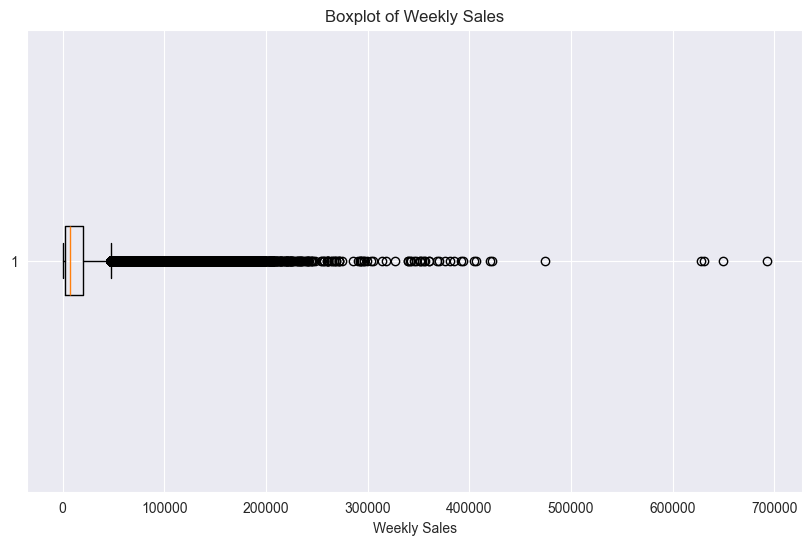

In [167]:
# Check Weekly_Sales outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(df['Weekly_Sales'], vert=False)
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.show()

According to the BoxPlot, sales data have a right-skewed distribution, especially in retail where a few products or departments might have exceptionally high sales compared to others. There are most likely not to be removed, as this could be pointing to special events, holidays, or depending on regional area(Busy urban areas vs small cities). Therefore we will retain these data

In [168]:
df

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Store_Type,Store_Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,211.096358,8.106,False,5,32229.38,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,192.308899,8.667,False,93,2487.80,B,118221
421566,45,2012-10-26,58.85,3.882,192.308899,8.667,False,94,5203.31,B,118221
421567,45,2012-10-26,58.85,3.882,192.308899,8.667,False,95,56017.47,B,118221
421568,45,2012-10-26,58.85,3.882,192.308899,8.667,False,97,6817.48,B,118221


In [169]:
# Save dataset
df.to_csv('./data/preprocessed/main.csv', sep='\t', encoding='utf-8', index=False, header=True)

### Additional Codes/Helper methods used

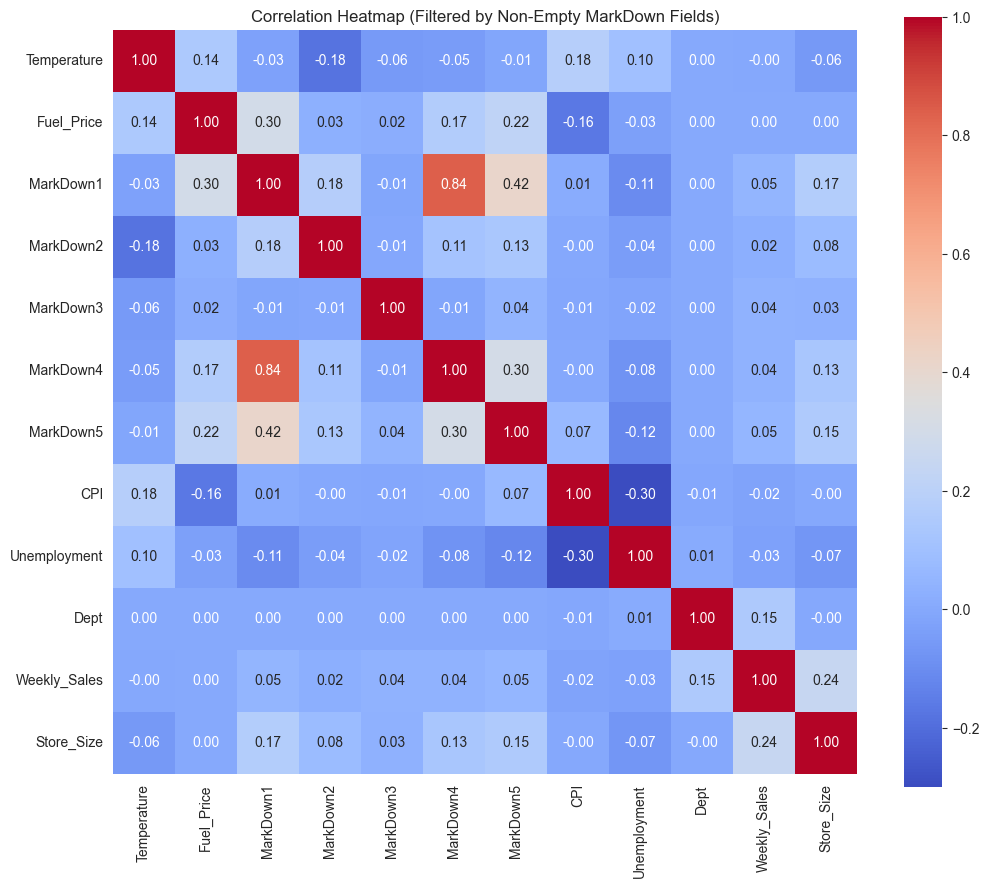

In [143]:
# Generating a plot to see if there is correlation with MarkDown1-5 fields to make a decision to remove them or retain them.

import seaborn as sns
import matplotlib.pyplot as plt

# Filter rows where all MarkDown columns are not empty
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
filtered_df = df.dropna(subset=markdown_columns)

numerical_df = filtered_df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Heatmap (Filtered by Non-Empty MarkDown Fields)")
plt.show()